In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.parser import parse

import os
import sys
import re

In [9]:
# Set file path
file_path = '/Users/jiminking/Desktop/LA/WebScraping/coupang_baby_preprocessed.csv'

# Load data to pandas DataFrame
data = pd.read_csv(file_path)

# Data information
print(data.info())
print(data.tail())
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_name_          771 non-null    object
 1   discount            771 non-null    object
 2   original_price      771 non-null    int64 
 3   sale_price          771 non-null    int64 
 4   rating_score        771 non-null    int64 
 5   total_reviews       771 non-null    int64 
 6   item_info           756 non-null    object
 7   delivery_guarantee  771 non-null    int64 
 8   delivery_days       771 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 54.3+ KB
None
                      item_name_ discount  original_price  sale_price  \
766            랄랄라 사운드 벽보 8: 구구단      37%            5000        3150   
767                   종이나라 투명나라풀      53%           14400        6630   
768         지앤마 써니비 남아용 1단계 유아칫솔      13%            9900        8550   
769  2080 브레드이발소 키즈 

,item_name_,discount,original_price,sale_price,rating_score,total_reviews,item_info,delivery_guarantee,delivery_days
0,주니 유아용 자기주도 빨대컵 210ml,28%,35000,25000,90,119,"화이트, 1개",1,1
1,한글떼기 1~5과정 세트 전5권(개정판)(유아4~7세),10%,30000,27000,100,1692,기탄출판,1,1
2,초등 미니 논술 일력 365,10%,19800,17820,100,18,서사원주니어,1,1
3,락피도 철분 키즈,55%,37000,16540,100,2905,"90g, 1개",1,1
4,아토팜 판테놀 유아 크림,48%,47000,24110,100,740,"100ml, 1개",1,1


In [12]:
# Basic statistical measures for 'sale_price', 'original_price'
mean_original_price = round(data['original_price'].mean())
median_original_price = round(data['original_price'].median())
std_dev_original_price = round(data['original_price'].std())

mean_sale_price = round(data['sale_price'].mean())
median_sale_price = round(data['sale_price'].median())
std_dev_sale_price = round(data['sale_price'].std())


print(f"Original price - Mean: {mean_original_price} 원, Median: {median_original_price} 원, Std Dev: {std_dev_original_price}원")
print(f"Sale price - Mean: {mean_sale_price} 원, Median: {median_sale_price} 원, Std Dev: {std_dev_sale_price}원")

Original price - Mean: 25742 원, Median: 19900 원, Std Dev: 18983원
Sale price - Mean: 18811 원, Median: 13500 원, Std Dev: 15075원


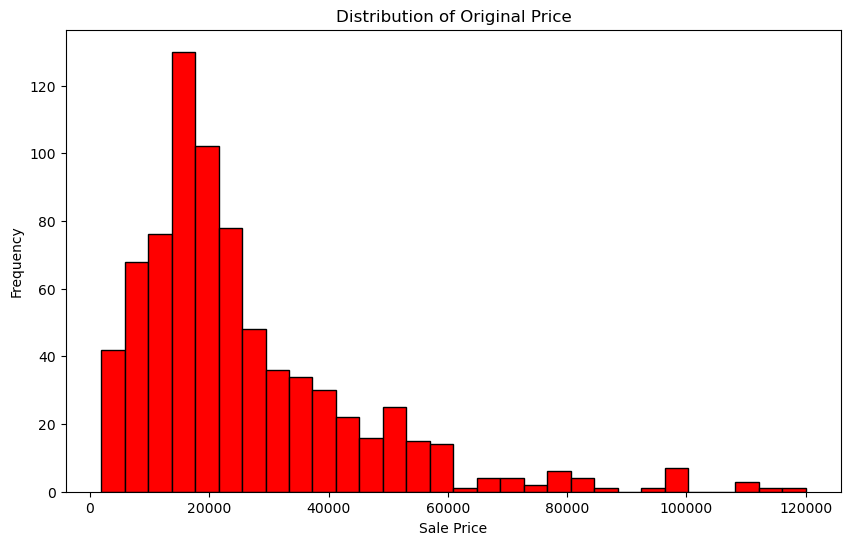

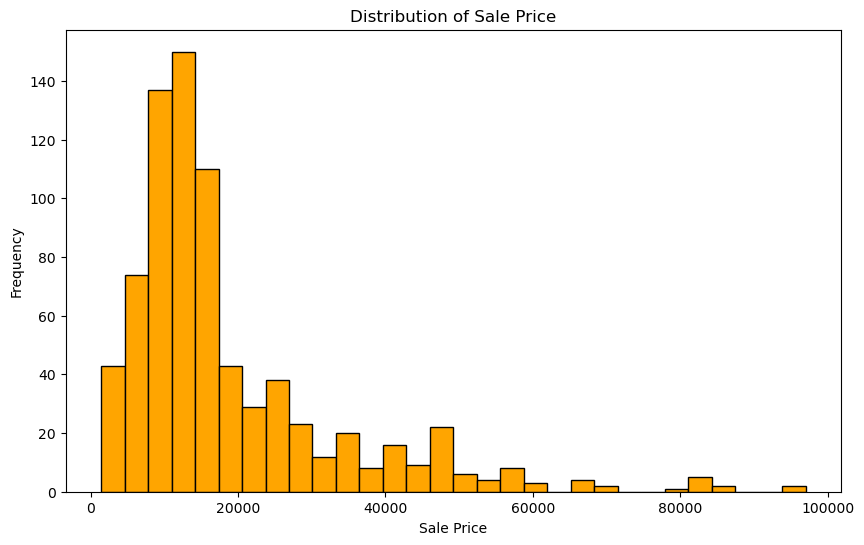

In [18]:
# Creating a histogram for 'sale_price' and 'original_price'
plt.figure(figsize=(10, 6))
plt.hist(data['original_price'], bins=30, color='red', edgecolor='black')
plt.title('Distribution of Original Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(data['sale_price'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Sorting the dataframe by 'total_reviews' in descending order to see the most popular items first
df_sorted_by_reviews = data.sort_values(by='total_reviews', ascending=False).reset_index(drop=True)
df_sorted_by_reviews.head(50)

,item_name_,discount,original_price,sale_price,rating_score,total_reviews,item_info,delivery_guarantee,delivery_days
0,코멧 아기물티슈 오리지널 캡형 50평량,38%,18000,10990,100,337867,"100매, 10팩",1,1
1,코멧 아기물티슈 오리지널 캡형 50평량,38%,34900,21490,100,337867,"100매, 20팩",1,1
2,베베앙 오리지널 플러스 아기물티슈 캡형 55평량,44%,49800,27830,100,293951,"100매, 20개",1,1
3,베베앙 오리지널 플러스 아기물티슈 캡형 55평량,43%,24900,13980,100,293951,"100매, 10개",1,1
4,코멧 저자극 시그니처 아기 물티슈 엠보싱 캡형 55평량,46%,23900,12790,100,265113,"100매, 10팩",1,1
5,코멧 저자극 시그니처 아기 물티슈 엠보싱 캡형 55평량,32%,36900,24990,100,265113,"100매, 20팩",1,1
6,고려은단 비타민C 1000,22%,36000,27950,100,193297,"300정, 1개",0,1
7,고려은단 비타민C 1000 + 쇼핑백,6%,36000,33790,100,193297,"180정, 2개",1,1
8,베베숲 센시티브 엠보싱 물티슈 휴대캡형 65gsm,12%,26200,22900,100,151537,"80매, 10개",0,2
9,베베숲 저자극 제로 물티슈 캡형 55평량,7%,42000,38800,100,132695,"80개입, 20개",0,2
